In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Read an image file into an array

In [38]:
def img_to_array(filepath):
    img = cv2.imread(filepath,cv2.IMREAD_UNCHANGED)
    if len(img.shape) > 2:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return np.array(img_rgb)
    else:
        return np.array(img)

## Write an array into an image file

In [39]:
def array_to_img(array,filepath):
    if len(array.shape) > 2:
        image_bgr = cv2.cvtColor(array, cv2.COLOR_RGB2BGR)
        cv2.imwrite(filepath,image_bgr)
    else:
        cv2.imwrite(filepath,array)


In [40]:
gray_image = np.random.randint(0, 256, (100, 100), dtype=np.uint8)
color_image = np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8)

array_to_img(gray_image,"../media/gray_image.png")
array_to_img(color_image,"../media/color_image.png")

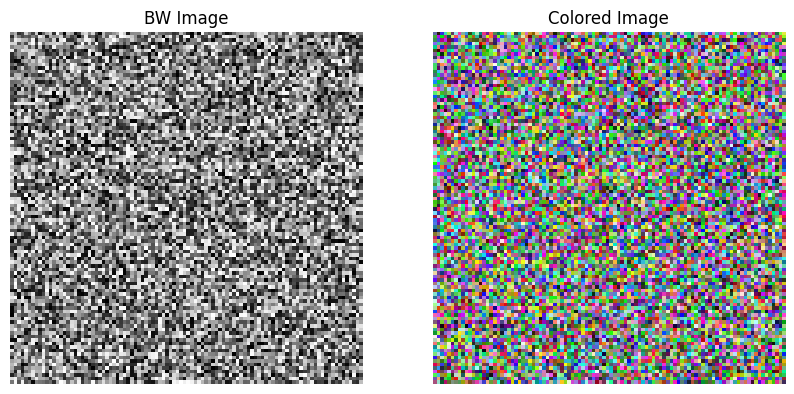

In [42]:
bw_img = img_to_array("../media/gray_image.png")
color_img = img_to_array("../media/color_image.png")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(bw_img,cmap="gray")
axes[0].axis('off')
axes[0].set_title("BW Image")

axes[1].imshow(color_img)
axes[1].axis('off')
axes[1].set_title("Colored Image")

plt.show()

## Change brightness of the image.

### Changing brightness by multiplication

In [43]:
def change_brightness_mult(img_path,factor):
    # Convert image to array
    pixels = img_to_array(img_path)
    # Change data type of array to avoid overflow
    pixels = pixels.astype(np.uint16)
    
    # Multiply each pixel by factor to change brightness
    if len(pixels.shape) >= 3:
        for i in range(pixels.shape[0]):
            for j in range(pixels.shape[1]):
                for k in range(pixels.shape[2]):
                    pixels[i][j][k] = pixels[i][j][k]*factor

    else:
        for i in range(pixels.shape[0]):
            for j in range(pixels.shape[1]):
                pixels[i][j] = pixels[i][j]*factor

    # Clip the values to ensure they are between 0 and 255
    pixels = np.clip(pixels,0,255)
    return pixels


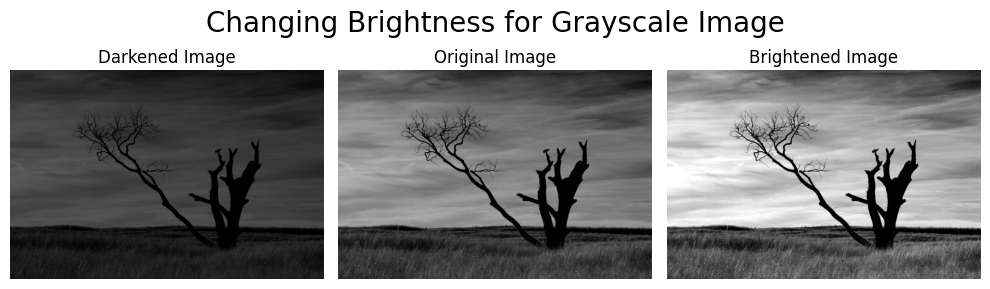

In [44]:
brightened_img = change_brightness_mult("../media/bwimage.jpg",1.5)
darkened_img = change_brightness_mult("../media/bwimage.jpg",0.5)

orig_img = mpimg.imread("../media/bwimage.jpg")

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
axes[0].imshow(darkened_img)
axes[0].axis('off')
axes[0].set_title("Darkened Image")

axes[1].imshow(orig_img)
axes[1].axis('off')
axes[1].set_title("Original Image")

axes[2].imshow(brightened_img)
axes[2].axis('off')
axes[2].set_title("Brightened Image")

fig.suptitle("Changing Brightness for Grayscale Image", fontsize=20)
plt.tight_layout()
plt.show()



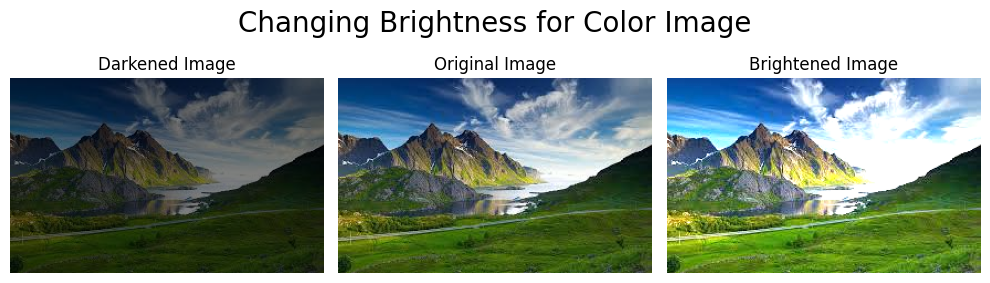

In [45]:
brightened_img = change_brightness_mult("../media/scenery.jpeg",1.5)
darkened_img = change_brightness_mult("../media/scenery.jpeg",0.5)

orig_img = mpimg.imread("../media/scenery.jpeg")

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
axes[0].imshow(darkened_img)
axes[0].axis('off')
axes[0].set_title("Darkened Image")

axes[1].imshow(orig_img)
axes[1].axis('off')
axes[1].set_title("Original Image")

axes[2].imshow(brightened_img)
axes[2].axis('off')
axes[2].set_title("Brightened Image")

fig.suptitle("Changing Brightness for Color Image", fontsize=20)
plt.tight_layout()
plt.show()

### Changing brightness by addition

In [46]:
def change_brightness_add(img_path,factor_red,factor_green,factor_blue):
    # Change image to array
    pixels = img_to_array(img_path)

    # Change datatype to avoid overflow
    pixels = pixels.astype(np.uint16)
    
    # Add values to RGB channels
    if len(pixels.shape) > 2:
        for i in range(pixels.shape[0]):
            for j in range(pixels.shape[1]):
                pixels[i][j][0] = pixels[i][j][0]+factor_red
                pixels[i][j][1] = pixels[i][j][1]+factor_green            
                pixels[i][j][2] = pixels[i][j][2]+factor_blue
    else:
        for i in range(pixels.shape[0]):
            for j in range(pixels.shape[1]):
                pixels[i][j] = pixels[i][j]+factor_red
   
    # Clip to ensure pixel value is between 0 to 255
    pixels = np.clip(pixels,0,255)
    return pixels

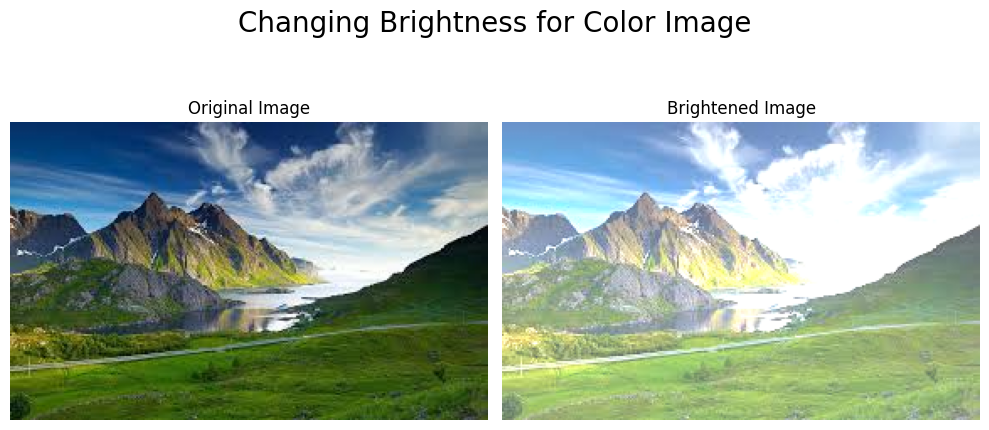

In [47]:
brightened_img = change_brightness_add("../media/scenery.jpeg",100,100,100)
orig_img = mpimg.imread("../media/scenery.jpeg")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(orig_img)
axes[0].axis('off')
axes[0].set_title("Original Image")

axes[1].imshow(brightened_img)
axes[1].axis('off')
axes[1].set_title("Brightened Image")

fig.suptitle("Changing Brightness for Color Image", fontsize=20)
plt.tight_layout()
plt.show()

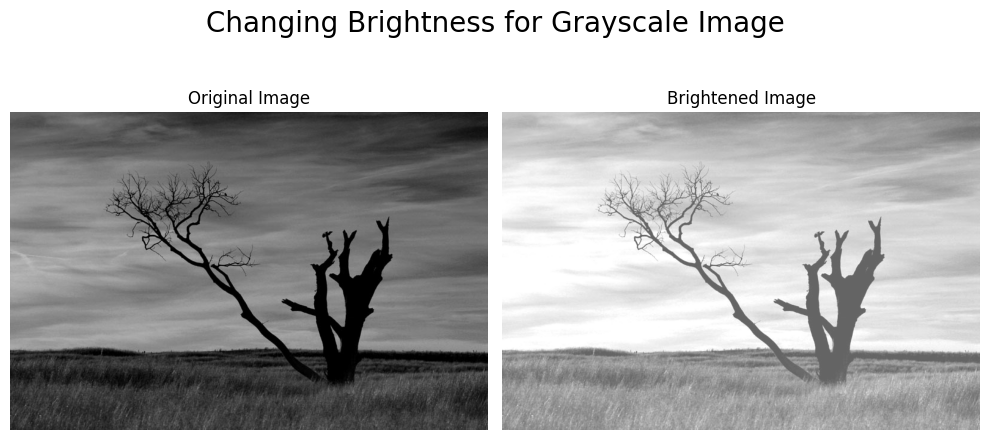

In [48]:
brightened_img = change_brightness_add("../media/bwimage.jpg",100,100,100)
orig_img = mpimg.imread("../media/bwimage.jpg")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(orig_img)
axes[0].axis('off')
axes[0].set_title("Original Image")

axes[1].imshow(brightened_img)
axes[1].axis('off')
axes[1].set_title("Brightened Image")

fig.suptitle("Changing Brightness for Grayscale Image", fontsize=20)
plt.tight_layout()
plt.show()

## Change contrast of the image

In [49]:
def change_contrast(img_path):
    # Convert image to array
    pixels = img_to_array(img_path)

    # Change datatype to avoid overflow
    pixels = pixels.astype(np.uint16)

    # Set minimum and maximum intensities
    a_max = 255
    a_min = 0

    if len(pixels.shape) == 2:
        min_intensity, max_intensity = pixels.min(), pixels.max()
        pixels = (pixels - min_intensity) * (a_max - a_min) / (max_intensity - min_intensity) + a_min
        pixels_norm = np.clip(pixels, 0, 255).astype(np.uint8)
        reconstructed_img = pixels_norm

    else:
        # Extract RGB channels
        red_channel = pixels[:, :, 0]
        green_channel = pixels[:, :, 1]
        blue_channel = pixels[:, :, 2]

        # Compute minimum and maximum intensity for each channel
        red_min, red_max = red_channel.min(), red_channel.max()
        green_min, green_max = green_channel.min(), green_channel.max()
        blue_min, blue_max = blue_channel.min(), blue_channel.max()    

        # Modify the pixels for contrast streching
        red_channel = (red_channel-red_min)*(a_max-a_min)/(red_max-red_min) + a_min
        green_channel = (green_channel-green_min)*(a_max-a_min)/(green_max-green_min) + a_min
        blue_channel = (blue_channel-blue_min)*(a_max-a_min)/(blue_max-blue_min) + a_min

        # Clip the values to ensure they are between 0 and 255
        red_channel_norm = np.clip(red_channel, 0, 255).astype(np.uint8)
        green_channel_norm = np.clip(green_channel, 0, 255).astype(np.uint8)
        blue_channel_norm = np.clip(blue_channel, 0, 255).astype(np.uint8)

        # Reconstruct image using new RGB channels
        reconstructed_img = np.stack([red_channel_norm, green_channel_norm, blue_channel_norm], axis=-1)
    return reconstructed_img
    

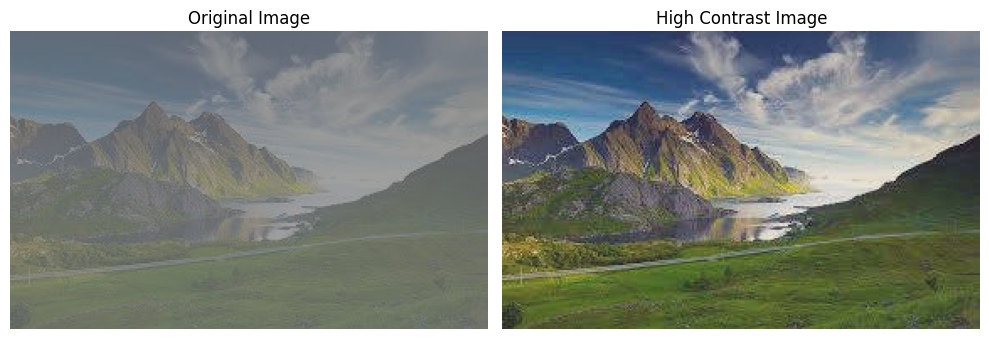

In [20]:
contrast_img = change_contrast("../media/low_contrast_scenery.jpg")
cv2.imwrite("../media/high_contrast.jpg",contrast_img)

orig_img = mpimg.imread("../media/low_contrast_scenery.jpg")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(orig_img)
axes[0].axis('off')
axes[0].set_title("Original Image")

axes[1].imshow(contrast_img)
axes[1].axis('off')
axes[1].set_title("High Contrast Image")

plt.tight_layout()
plt.show()

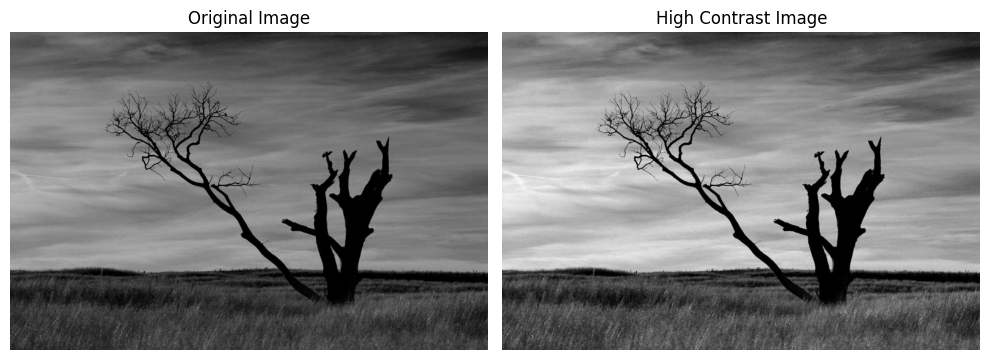

In [21]:
contrast_img = change_contrast("../media/bwimage.jpg")

orig_img = mpimg.imread("../media/bwimage.jpg")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(orig_img)
axes[0].axis('off')
axes[0].set_title("Original Image")

axes[1].imshow(contrast_img)
axes[1].axis('off')
axes[1].set_title("High Contrast Image")

plt.tight_layout()
plt.show()

In [22]:
def plot_histogram(image_path):
    image = img_to_array(image_path)
    r_channel, g_channel, b_channel = cv2.split(image)
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Adjusted figure size for better spacing

    # Define x-axis limits and ticks
    x_limits = (0, 255)
    x_ticks = range(0, 256, 50)

    # Red channel histogram
    axs[0].hist(r_channel.ravel(), bins=256, color='red', alpha=0.5)
    axs[0].set_title('Red Channel')
    axs[0].set_xlabel('Pixel Intensity')
    axs[0].set_ylabel('Frequency')
    axs[0].set_xlim(x_limits)
    axs[0].set_xticks(x_ticks)

    # Green channel histogram
    axs[1].hist(g_channel.ravel(), bins=256, color='green', alpha=0.5)
    axs[1].set_title('Green Channel')
    axs[1].set_xlabel('Pixel Intensity')
    axs[1].set_ylabel('Frequency')
    axs[1].set_xlim(x_limits)
    axs[1].set_xticks(x_ticks)

    # Blue channel histogram
    axs[2].hist(b_channel.ravel(), bins=256, color='blue', alpha=0.5)
    axs[2].set_title('Blue Channel')
    axs[2].set_xlabel('Pixel Intensity')
    axs[2].set_ylabel('Frequency')
    axs[2].set_xlim(x_limits)
    axs[2].set_xticks(x_ticks)

    fig.suptitle("High Contrast", fontsize=16)    
    plt.tight_layout()
    plt.show()

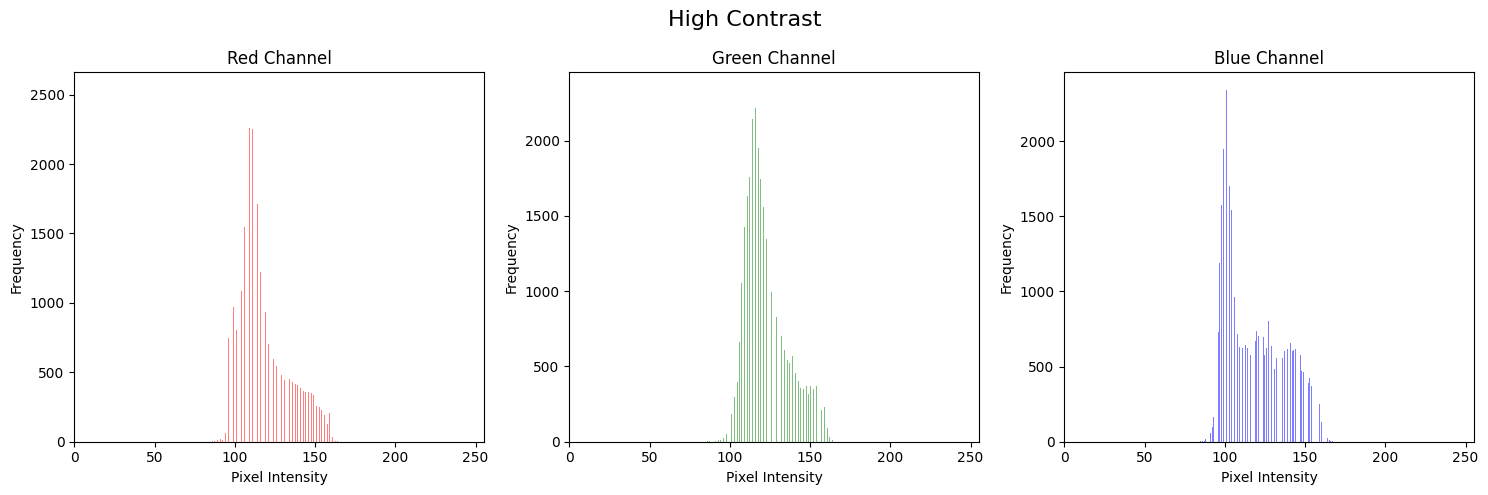

In [23]:
plot_histogram("../media/low_contrast_scenery.jpg")

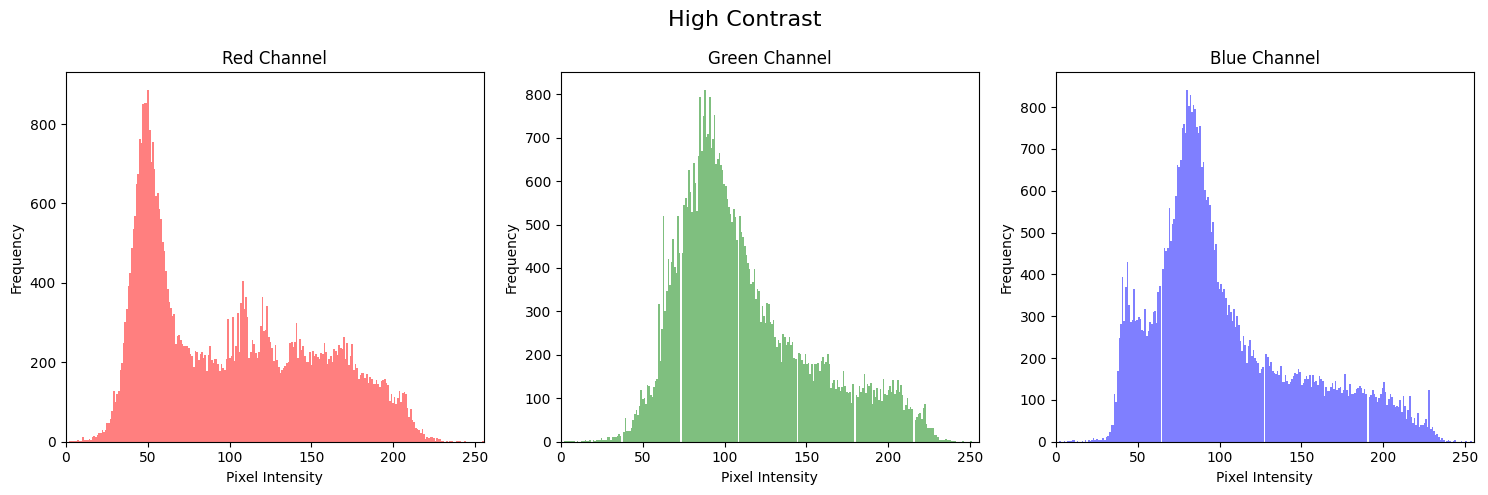

In [24]:
plot_histogram("../media/high_contrast.jpg")

## Change a colour image to grayscale.

In [25]:
def color_to_grayscale(img_path):
    # Determine the values of alpha, beta and gamma
    alpha = np.random.uniform(0, 1)
    beta = np.random.uniform(0, 1 - alpha)
    gamma = 1 - alpha - beta

    # Convert image to array
    pixels = img_to_array(img_path)

    # Change data type to avoid overflow
    pixels = pixels.astype(np.uint16)

    # Declare 2-D array to store grayscale values
    gray_scale_pixels = np.empty([pixels.shape[0], pixels.shape[1]], dtype=np.uint8)

    # Convert color pixels to grayscale pixels
    for i in range(pixels.shape[0]):
        for j in range(pixels.shape[1]):
            gray_scale_pixels[i][j] = int(alpha*pixels[i][j][0] + beta*pixels[i][j][1] + gamma*pixels[i][j][2])
    
    # Clip to ensure they are between 0 to 255
    gray_scale_pixels = np.clip(gray_scale_pixels, 0,255)
    
    return gray_scale_pixels

In [26]:
def color_to_grayscale_standard(img_path):
    # Determine the values of alpha, beta and gamma
    alpha = 0.299
    beta = 0.587
    gamma = 0.114

    # Convert image to array
    pixels = img_to_array(img_path)

    # Change data type to avoid overflow
    pixels = pixels.astype(np.uint16)

    # Declare 2-D array to store grayscale values
    gray_scale_pixels = np.empty([pixels.shape[0], pixels.shape[1]], dtype=np.uint8)

    # Convert color pixels to grayscale pixels
    for i in range(pixels.shape[0]):
        for j in range(pixels.shape[1]):
            gray_scale_pixels[i][j] = int(alpha*pixels[i][j][0] + beta*pixels[i][j][1] + gamma*pixels[i][j][2])
    
    # Clip to ensure they are between 0 to 255
    gray_scale_pixels = np.clip(gray_scale_pixels, 0,255)
    
    return gray_scale_pixels

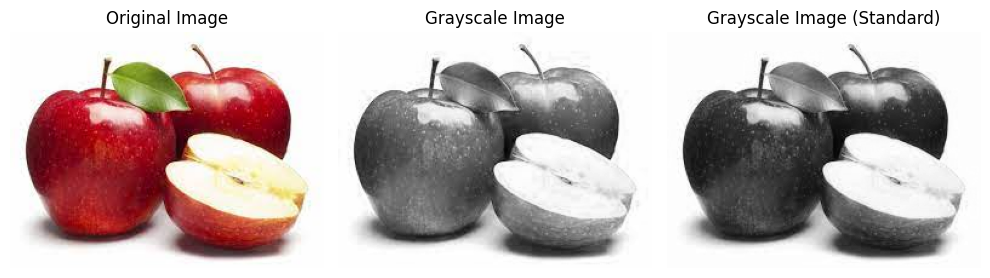

In [32]:
gray_img = color_to_grayscale("../media/apple.jpeg")
gray_img_std = color_to_grayscale_standard("../media/apple.jpeg")

orig_img = mpimg.imread("../media/apple.jpeg")

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

axes[0].imshow(orig_img)
axes[0].axis('off')
axes[0].set_title("Original Image")

axes[1].imshow(gray_img, cmap='gray')
axes[1].axis('off')
axes[1].set_title("Grayscale Image")

axes[2].imshow(gray_img_std, cmap='gray')
axes[2].axis('off')
axes[2].set_title("Grayscale Image (Standard)")

plt.tight_layout()
plt.show()

## Convert a grayscale image to color using a pseudo color mapping.

In [69]:
def create_colormap():
    colormap = np.zeros((256, 3), dtype=np.uint8)
    
    # Red to Green (0-85)
    colormap[0:86, 0] = 255            # Red channel
    colormap[0:86, 1] = np.linspace(0, 255, 86, dtype=np.uint8)  # Green channel
    colormap[0:86, 2] = 0              # Blue channel
    
    # Green to Blue (86-170)
    colormap[86:171, 0] = np.linspace(255, 0, 85, dtype=np.uint8)  # Red channel
    colormap[86:171, 1] = 255            # Green channel
    colormap[86:171, 2] = np.linspace(0, 255, 85, dtype=np.uint8)  # Blue channel
    
    # Blue to Red (171-255)
    colormap[171:, 0] = 0              # Red channel
    colormap[171:, 1] = np.linspace(255, 0, 85, dtype=np.uint8)  # Green channel
    colormap[171:, 2] = 255            # Blue channel
    
    return colormap


In [70]:
def grayscale_to_color(img_path):
    # Convert image to array
    pixels = img_to_array(img_path)

    # Change datatype to avoid overflow
    pixels = pixels.astype(np.uint16)

    gray_image = pixels[:, :, 0]
    colormap = create_colormap()
    color_pixels = colormap[gray_image]
    return color_pixels

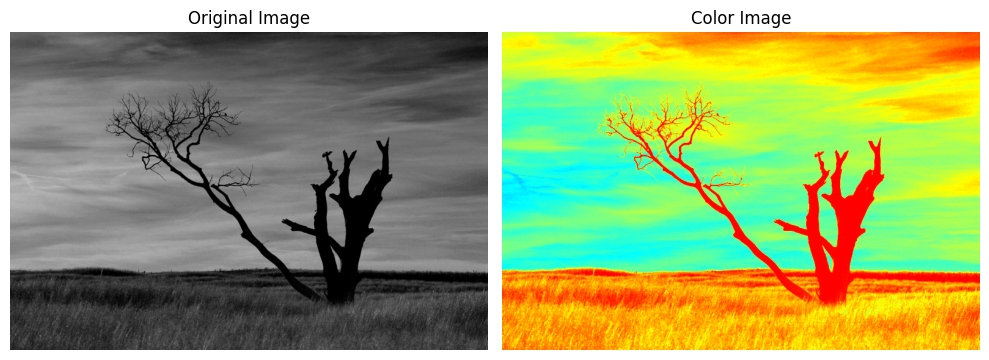

In [71]:
contrast_img = grayscale_to_color("../media/bwimage.jpg")

orig_img = mpimg.imread("../media/bwimage.jpg")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(orig_img)
axes[0].axis('off')
axes[0].set_title("Original Image")

axes[1].imshow(contrast_img, cmap='gray')
axes[1].axis('off')
axes[1].set_title("Color Image")

plt.tight_layout()
plt.show()

## Green Screen

In [55]:
def manual_resize(img,new_width,new_height):
    orig_height, orig_width = img.shape[:2]
    resized_img = np.zeros((new_height, new_width, 3), dtype=np.uint8)

    # Calculate the ratio of the old dimensions to the new dimensions
    row_ratio = orig_height / new_height
    col_ratio = orig_width / new_width

    # Iterate over the pixels of the resized image
    for i in range(new_height):
        for j in range(new_width):
            orig_i = int(i * row_ratio)
            orig_j = int(j * col_ratio)

            resized_img[i,j] = img[orig_i,orig_j]
    
    return resized_img

In [56]:
def replace_background(img_path,bg_path):
    img = img_to_array(img_path)
    bg = img_to_array(bg_path)

    if img.shape[:2] != bg.shape[:2]:
        bg = manual_resize(bg, img.shape[1], img.shape[0])

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            green = img[i][j][1]
            if green>190:
                img[i][j] = bg[i][j]
    
    return img

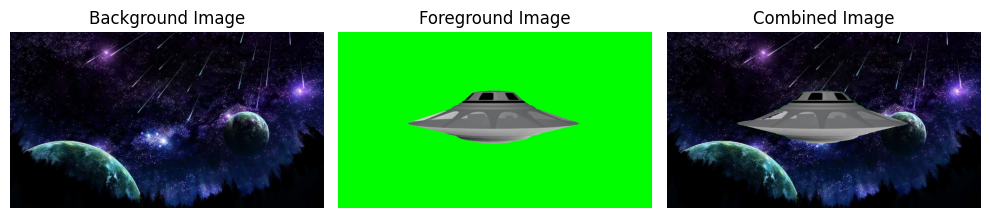

In [57]:
background_image = img_to_array("../media/space_bgx.jpg")
foreground_image = img_to_array("../media/ufo.jpg")

combined_image = replace_background("../media/ufo.jpg","../media/space_bgx.jpg")

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes[0].imshow(background_image)
axes[0].axis('off')
axes[0].set_title("Background Image")

axes[1].imshow(foreground_image)
axes[1].axis('off')
axes[1].set_title("Foreground Image")

axes[2].imshow(combined_image)
axes[2].axis('off')
axes[2].set_title("Combined Image")

plt.tight_layout()
plt.show()

### Read a video file and convert into an sequence (array) of images

In [106]:
def video_to_frames(video_path):
    # Open the video file
    video = cv2.VideoCapture(video_path)
    frames = []

    while True:
        # Read a frame from the video
        ret, frame = video.read()
        if not ret:
            break
        frames.append(frame)
    
    # Release the video capture object
    video.release()
    return frames

In [107]:
frames = video_to_frames("../media/earth_rotating.avi")

In [108]:
def frames_to_video(frames, output_path, fps):
    # Dimensions of the frame
    height, width, layers = frames[0].shape

    # Define the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    video = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    # Write each frame to the video file
    for frame in frames:
        video.write(frame)

    cv2.destroyAllWindows()
    video.release()

In [109]:
output_path = "../media/earth_rotating_fast.avi"
fps = 120
frames_to_video(frames, output_path, fps)

### Create a 1 second transition video (fade, slide, any other) from one image to another

In [78]:
def create_transition(img1_path,img2_path, output_path):
    img1=cv2.imread(img1_path)
    img2=cv2.imread(img2_path)

    height,width,layers = img1.shape
    img2 = cv2.resize(img2,(width,height))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # You can change this for different formats
    video = cv2.VideoWriter(output_path, fourcc, 2, (width, height))

    video.write(img1)
    video.write(img2)

    cv2.destroyAllWindows()
    video.release()

In [79]:
create_transition("../media/lotus_bud.jpeg","../media/lotus.jpg","../media/transition.mov")